In [ ]:
# %load_ext tensorboard

In [ ]:
# path = '/content/drive/My Drive/CROPP/input'

# from google.colab import drive                
# drive.mount('/content/drive')                



In [ ]:
# # To check working of above thing
# !ls '/content/drive/My Drive/B.E PROJECT/CNN CROP/data/disease/input'

In [8]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [9]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'data/disease/input'

train_dir = os.path.join( base_dir, 'Training')
validation_dir = os.path.join( base_dir, 'Validation')


train_healthy_dir = os.path.join(train_dir, 'Healthy') 
train_mosaic_dir = os.path.join(train_dir, 'Mosaic_Virus') 
train_rust_dir = os.path.join(train_dir, 'Rust') 
train_woolyaphids_dir = os.path.join(train_dir, 'Wooly_aphids') 

print('Total Healthy : ', len(os.listdir(train_healthy_dir)))
print('Total Mosaic Virus : ', len(os.listdir(train_mosaic_dir)))
print('Total Rust : ', len(os.listdir(train_rust_dir)))
print('Total Wooly aphids : ', len(os.listdir(train_woolyaphids_dir)))

print('**********************************************')

validation_healthy_dir = os.path.join(validation_dir, 'Healthy') 
validation_mosaic_dir = os.path.join(validation_dir, 'Mosaic_Virus') 
validation_rust_dir = os.path.join(validation_dir, 'Rust') 
validation_woolyaphids_dir = os.path.join(validation_dir, 'Wooly_aphids') 

print('Validation Healthy : ', len(os.listdir(validation_healthy_dir)))
print('Validation Mosaic Virus : ', len(os.listdir(validation_mosaic_dir)))
print('Validation Rust : ', len(os.listdir(validation_rust_dir)))
print('Validation Woolyphids : ', len(os.listdir(validation_woolyaphids_dir)))


healthy_files = os.listdir(train_healthy_dir)
mosaic_files = os.listdir(train_mosaic_dir)
rust_files = os.listdir(train_rust_dir)
woolyphids_files = os.listdir(train_woolyaphids_dir)

Total Healthy :  115
Total Mosaic Virus :  111
Total Rust :  96
Total Wooly aphids :  110
**********************************************
Validation Healthy :  40
Validation Mosaic Virus :  40
Validation Rust :  40
Validation Woolyphids :  40


data/disease/input/Training/Healthy/healthy1212.jpg


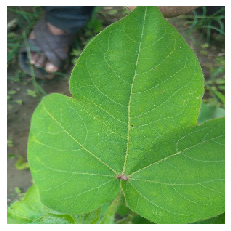

data/disease/input/Training/Healthy/healthy137.jpg


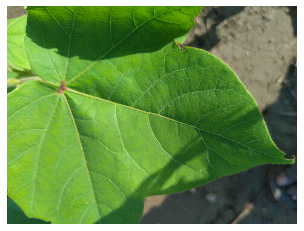

data/disease/input/Training/Mosaic_Virus/mosaic_virus689.jpg


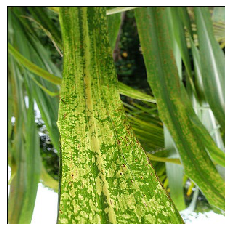

data/disease/input/Training/Mosaic_Virus/mosaic_virus474.jpg


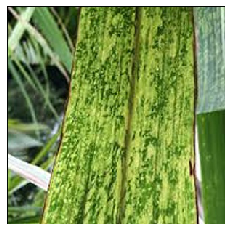

data/disease/input/Training/Rust/rust103.jpg


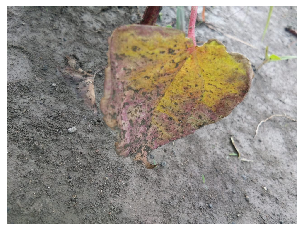

data/disease/input/Training/Rust/rust895.jpg


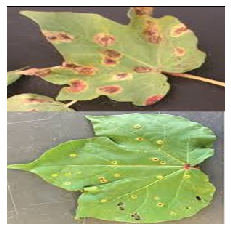

data/disease/input/Training/Wooly_aphids/woolyaphids658.jpg


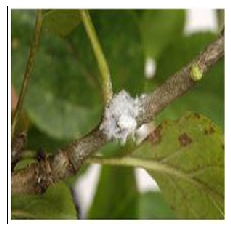

data/disease/input/Training/Wooly_aphids/woolyaphids894.jpg


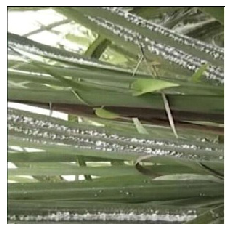

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgno = 2

next_healthy = [os.path.join(train_healthy_dir, fname) for fname in healthy_files[:imgno]]

next_mosaic = [os.path.join(train_mosaic_dir, fname) for fname in mosaic_files[:imgno]]

next_rust = [os.path.join(train_rust_dir, fname) for fname in rust_files[:imgno]]

next_woolyphids = [os.path.join(train_woolyaphids_dir, fname) for fname in woolyphids_files[:imgno]]
                   
for i, img_path in enumerate(next_healthy+next_mosaic+next_rust+next_woolyphids):
    print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [11]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
from time import time

In [12]:
base_dir = 'data/disease/input'

TRAINING_DIR = os.path.join(base_dir, 'Training')
training_datagen = ImageDataGenerator(
                      rescale = 1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest')

VALIDATION_DIR = os.path.join(base_dir, 'Validation')
validation_datagen = ImageDataGenerator(rescale = 1./255)

print("In Training")
train_generator = training_datagen.flow_from_directory(
                    TRAINING_DIR,
                    target_size=(300,300),
                    class_mode='categorical')

print("In Validation")
validation_generator = validation_datagen.flow_from_directory(
                    VALIDATION_DIR,
                    target_size=(300,300),
                    class_mode='categorical')

In Training
Found 432 images belonging to 4 classes.
In Validation
Found 160 images belonging to 4 classes.


In [13]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# testmodel = Sequential()
# testmodel.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)))
# testmodel.add(BatchNormalization())

# testmodel.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# testmodel.add(BatchNormalization())
# testmodel.add(MaxPooling2D(pool_size=(2, 2)))
# testmodel.add(Dropout(0.25))

# testmodel.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
# testmodel.add(BatchNormalization())
# testmodel.add(Dropout(0.25))

# testmodel.add(Conv2D(1024, kernel_size=(3, 3), activation='relu'))
# testmodel.add(BatchNormalization())
# testmodel.add(MaxPooling2D(pool_size=(2, 2)))
# testmodel.add(Dropout(0.25))

# testmodel.add(Flatten())

# testmodel.add(Dense(2048, activation='relu'))
# testmodel.add(BatchNormalization())
# testmodel.add(Dropout(0.5))

# testmodel.add(Dense(1024, activation='relu'))
# testmodel.add(BatchNormalization())
# testmodel.add(Dropout(0.5))

# testmodel.add(Dense(4, activation='softmax'))

# testmodel.compile(loss=tf.keras.losses.categorical_crossentropy,
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=['accuracy'])

# tensorboard = TensorBoard(log_dir="./logs/TEST/{}".format(time()), 
#                           histogram_freq=0, 
#                           write_graph=True, 
#                           write_grads=False, 
#                           write_images=False, 
#                           embeddings_freq=0, 
#                           embeddings_layer_names=None, 
#                           embeddings_metadata=None, 
#                           embeddings_data=None, 
#                           update_freq='epoch')

# history = testmodel.fit_generator(train_generator, 
#                                 epochs=5, verbose = 1,
#                                 validation_data = validation_generator,
#                                 callbacks = [tensorboard])

# model.save("cotton_disease-TEST.h5")

In [ ]:
model = tf.keras.models.Sequential([
    # ILayer
    tf.keras.layers.Conv2D(96, (11,11), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3, 3),

    # HLayer 1
    tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
  
    tf.keras.layers.Conv2D(384, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(384, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    # OLayer
    tf.keras.layers.Dense(4, activation='softmax')
])



model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir="./logs/{}".format(time()), 
                          histogram_freq=0, 
                          write_graph=True, 
                          write_grads=False, 
                          write_images=False, 
                          embeddings_freq=0, 
                          embeddings_layer_names=None, 
                          embeddings_metadata=None, 
                          embeddings_data=None, 
                          update_freq='epoch')

history = model.fit_generator(train_generator, 
                                epochs=10, verbose = 1,
                                validation_data = validation_generator,
                                callbacks = [tensorboard])

model.save("cotton_disease.h5")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 290, 290, 96)      34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 290, 290, 96)      384       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 96, 96, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 92, 92, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 92, 92, 256)       1024      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 384)      

In [ ]:
# model = tf.keras.models.Sequential([
#     # ILayer
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(300, 300, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     # HLayer 1
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
  
#     # HLayer 2
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     # HLayer 3
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
    
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
    
#     # OLayer
#     tf.keras.layers.Dense(4, activation='softmax')
# ])



# model.summary()

# model.compile(loss = 'categorical_crossentropy', 
#               optimizer='rmsprop', 
#               metrics=['accuracy'])

# tensorboard = TensorBoard(log_dir="./logs/{}".format(time()), 
#                           histogram_freq=0, 
#                           write_graph=True, 
#                           write_grads=False, 
#                           write_images=False, 
#                           embeddings_freq=0, 
#                           embeddings_layer_names=None, 
#                           embeddings_metadata=None, 
#                           embeddings_data=None, 
#                           update_freq='epoch')

# history = model.fit_generator(train_generator, 
#                                 epochs=20, verbose = 1,
#                                 validation_data = validation_generator,
#                                 callbacks = [tensorboard])

# model.save("cotton_disease.h5")

In [8]:
# import matplotlib.pyplot as plt
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))
# print(acc,"\n",val_acc,"\n",loss,"\n",val_loss)
# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()


# plt.show()